REGRESSION ALGORTIHM

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import plotly.express as px
import sklearn 
%matplotlib inline


In [2]:
df = pd.read_csv('C:\\Users\\Vedant\\Desktop\\TWO DIRECTION\\AIML\\VS CODE\\scikit\\datas\\insurance.csv')
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


NOW WE CHECK CORREALTION AMONG ALL


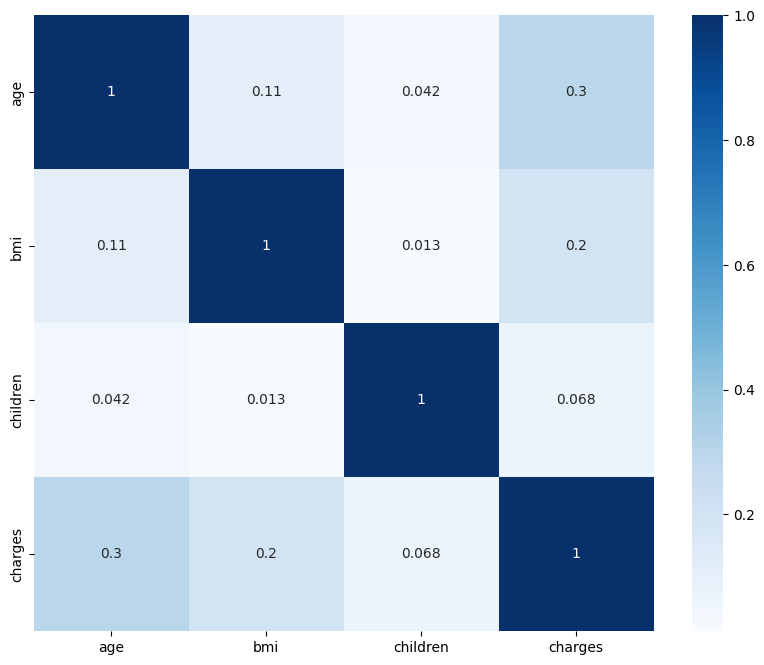

In [5]:
# Only use numeric columns for correlation to avoid string conversion errors
corre = df.select_dtypes(include=[float, int]).corr()
corre
plt.figure(figsize=(10,8))
sns.heatmap(corre,cmap='Blues',annot=True)
plt.show()

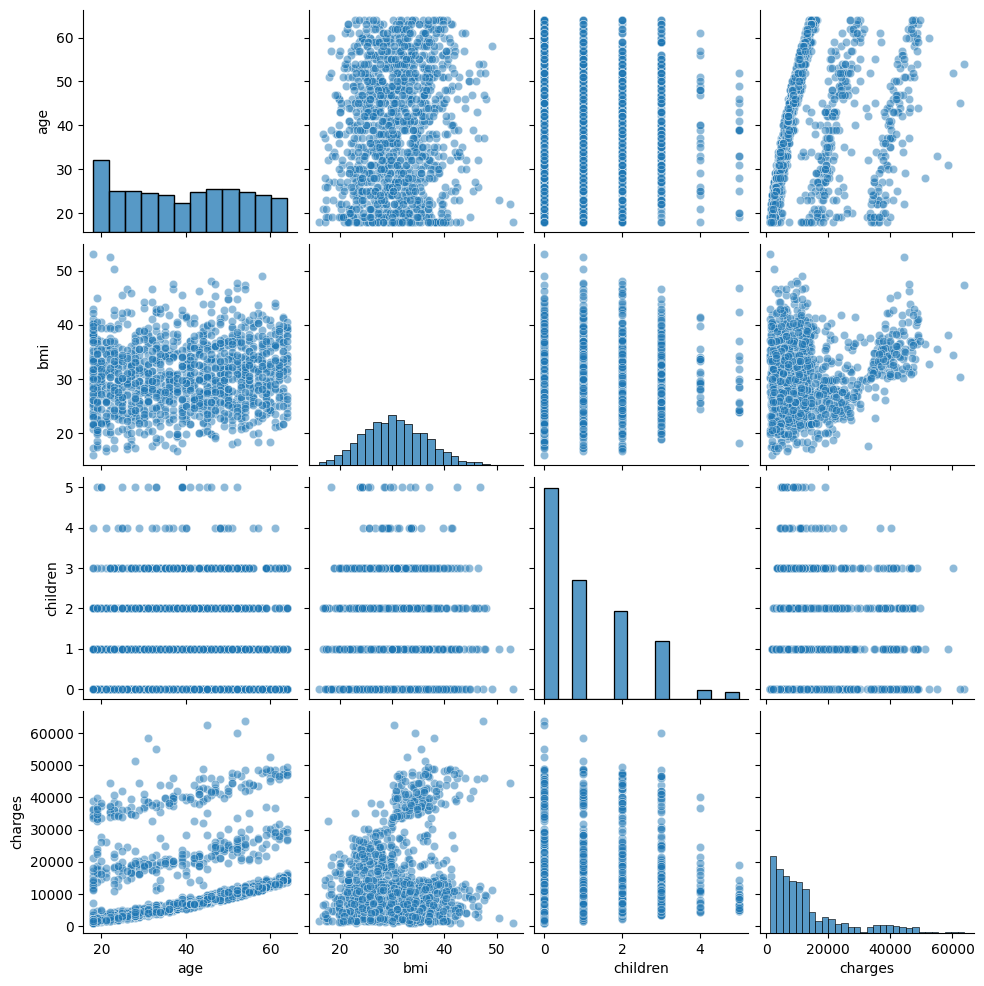

In [6]:
#NOW WE CHECK CORRELATION AMONG ALL THE COLUMNS

visual=df[['age','bmi','children','charges']]
sns.pairplot(visual,kind = 'scatter' , plot_kws={'alpha':0.5})

I GO WITH CHARGES AND AGE WHERE I TRY TO PREDICT CHARGE USING AGE
FOR MALE AND THEN FEMALE


In [7]:
no_female=df[df.sex=='male']


<Axes: title={'center': 'age vs charges only for male'}, xlabel='age', ylabel='charges'>

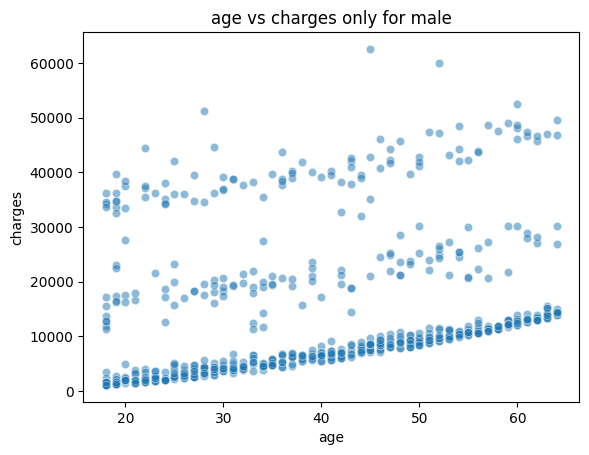

In [8]:
plt.title('age vs charges only for male')
sns.scatterplot(data=no_female,x='age',y='charges', alpha = 0.5 )


In [9]:
fig = px.scatter(df,x='age',y='charges',color='sex',opacity=0.5, title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

NOW WE ARE CREATING A MODEL TO PREDICT THE CHARGES


In [10]:
def estimate_charge(age , m , b):
    return m*age + b


In [11]:
m=50
b=600   #asuuming a constant value to fir the linear regression

In [12]:
#create a varibale with only age of males
ages=no_female.age
ages

1       18
2       28
3       33
4       32
8       37
        ..
1324    31
1325    61
1327    51
1329    52
1333    50
Name: age, Length: 676, dtype: int64

In [76]:
predictions=estimate_charge(ages,m,b)
predictions

1       1000
2       1500
3       1750
4       1700
8       1950
        ... 
1324    1650
1325    3150
1327    2650
1329    2700
1333    2600
Name: age, Length: 676, dtype: int64

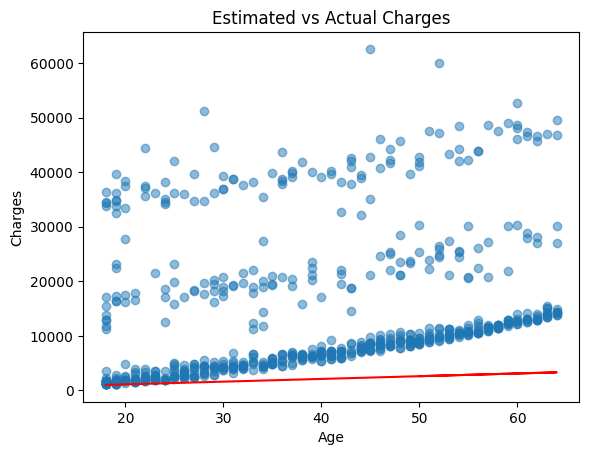

In [77]:
target=no_female.charges
plt.plot(ages,predictions,color='red')
plt.scatter(ages,target,alpha=0.5)
plt.title('Estimated vs Actual Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [78]:
def try_parameters(m,b):
    ages = no_female.age
    target = no_female.charges
    predictions = estimate_charge(ages,m,b)
    plt.plot(ages,predictions,color='red')
    plt.scatter(ages,target,alpha=0.5)
    plt.title('Estimated vs Actual Charges')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.show()

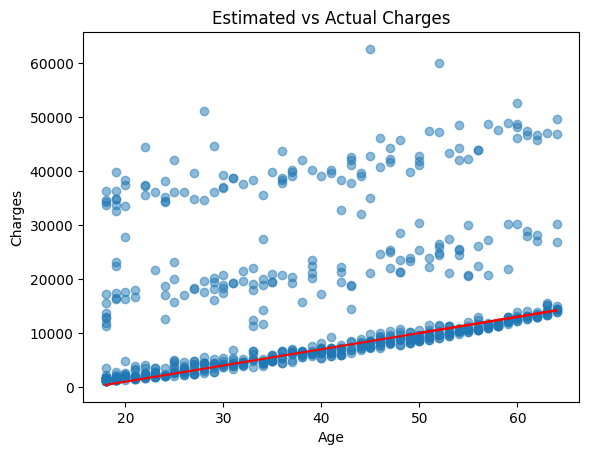

In [64]:
try_parameters(300,-5000)

In [ ]:
def rmse(target , predictions):
    return np.sqrt(((predictions - target) ** 2).mean())


Let's compute the RMSE for our model 

In [72]:
m = 50
b = 100

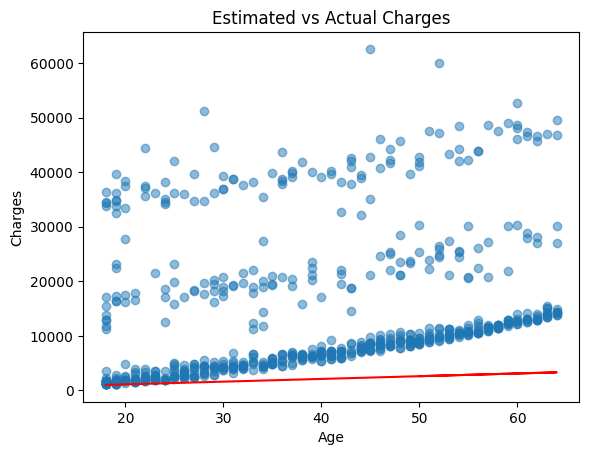

In [73]:
try_parameters(m,b)

In [74]:
targets= no_female['charges']
predicted2 = estimate_charge(ages,m,b)

In [106]:
rmse(targets , predicted2)

np.float64(17470.61485766144)

In [80]:
def try_parameters(m,b):
    ages = no_female.age
    target = no_female.charges

    predictions = estimate_charge(ages,m,b)

    plt.plot(ages,predictions,color='red',alpha = 0.5)
    plt.scatter(ages,target,alpha=0.5)
    plt.title('Estimated vs Actual Charges')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction' , 'Actual'])

    loss = rmse(target, predictions)
    print('RMSE Loss :', loss)

RMSE Loss : 14949.69714522146


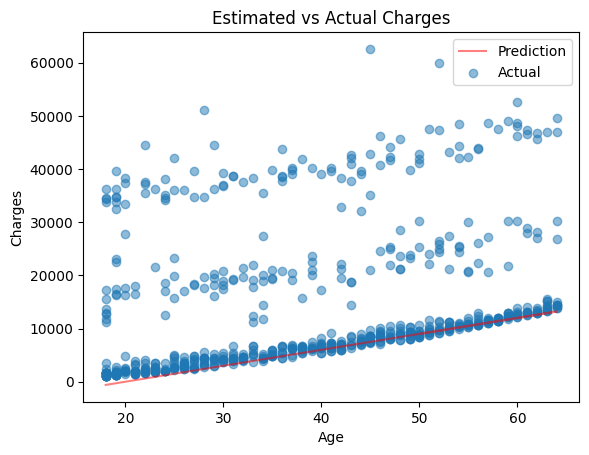

In [108]:
try_parameters(300,-6000)

LINEAR REGRESSION USING SCIKIT-LEARN

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [97]:
inputs = no_female[['age']]
targets = no_female.charges

In [101]:
model.fit(inputs , targets )

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
predictions = model.predict(inputs)
predictions

array([ 8504.03795814, 11110.85135024, 12414.2580463 , 12153.57670709,
       13456.98340314, 10328.80733261,  9807.44465419, 10850.17001103,
        8764.71929735,  9807.44465419, 18409.92884814, 11632.21402867,
        8504.03795814, 13456.98340314,  9807.44465419, 11892.89536788,
        9546.76331498, 20234.69822262, 11110.85135024,  8764.71929735,
       10589.48867182, 12935.62072472, 19452.65420499, 14499.70875998,
       13717.66474235, 18149.24750893, 13196.30206393, 16324.47813446,
       13196.30206393, 18931.29152656,  8504.03795814, 15021.0714384 ,
       10328.80733261, 20495.37956183, 14239.02742077, 11110.85135024,
       11892.89536788, 18931.29152656, 15281.75277762, 18670.61018735,
        9286.08197577, 11892.89536788,  9546.76331498, 15542.43411683,
       19191.97286578, 12935.62072472, 18149.24750893, 18409.92884814,
       13717.66474235, 11632.21402867,  9025.40063656, 10589.48867182,
       11371.53268946, 20234.69822262, 17888.56616972, 13456.98340314,
      

In [107]:
rmse(targets , predictions)

np.float64(12433.976109849502)

In [113]:
M=model.coef_ #m value

In [114]:
B=model.intercept_ #b value   

RMSE Loss : 12433.976109849502


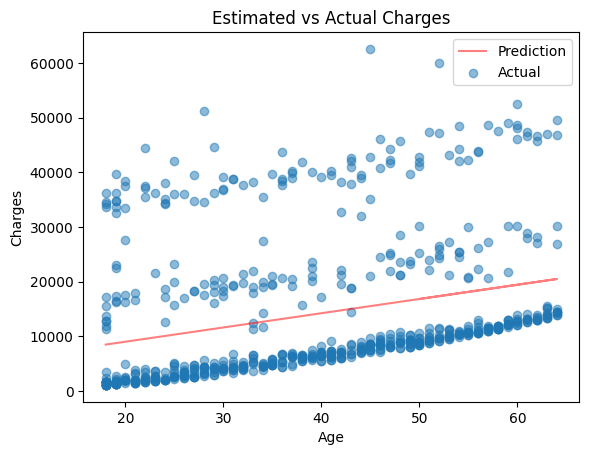

In [115]:
try_parameters(M,B)